In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [4]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [5]:
df = df.drop(['show_id'], axis=1)
na = df.isna().sum()
na[na!=0].sort_values(ascending=False)

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

In [6]:
# 補分級
df['rating'] = df['rating'].fillna('R')

In [7]:
New_df = df.dropna(axis=0, how='any', inplace=True)
New_df

In [8]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [99]:
# 取得全部導演(不重複)
director_list=[]

for n in df['director']:
    director_list.append(n)
All_director = list(set(director_list))

In [137]:
# 導演拍攝的數量存入Dict
# All_director_list=[]
Director_dict = {}
for n in All_director:
    Director_dict[n] = director_list.count(n)

In [139]:
a = pd.DataFrame(list(Director_dict.items()))
HOT = (a[1]>7)
a[HOT]

,0,1
951,Johnnie To,8
1369,Marcus Raboy,12
1870,"Raúl Campos, Jan Suter",18
2378,Jay Karas,13
2415,Steven Spielberg,9
2577,David Dhawan,8
2659,Jay Chapman,12
2843,Martin Scorsese,9


[8, 12, 18, 13, 9, 8, 12, 9]
['Johnnie To', 'Marcus Raboy', 'Raúl Campos, Jan Suter', 'Jay Karas', 'Steven Spielberg', 'David Dhawan', 'Jay Chapman', 'Martin Scorsese']


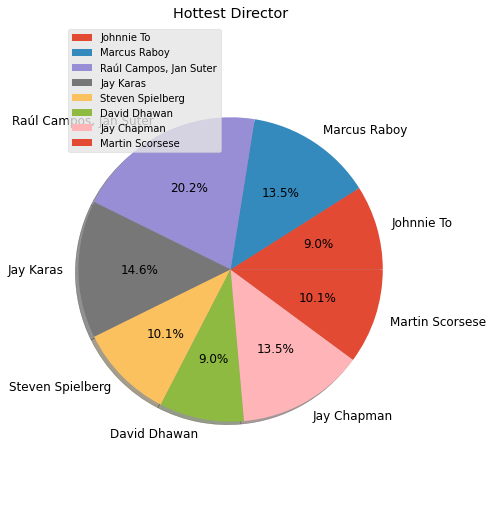

In [136]:
#列出Netflix上前八名的導演
plt.figure(figsize=(6,9))
labels = list(a[HOT][0])
size=a[HOT][1]
print(list(size))
print(labels)
plt.pie(list(size),
        labels=labels,
        autopct="%1.1f%%",
        
        pctdistance=0.6,
        textprops={'fontsize':12},
        shadow=True)
plt.axis('equal')
plt.title("Hottest Director")
plt.legend(loc="best")

In [140]:
# Netflix電影/電視劇製作國家
target_list=[]
for n in df['country']:
#     print("n是:", n)
    try:
        n_list = n.split(', ')
        for target in n_list:
#             print("target是: ", target)
            target_list.append(target)
    except:
        target_list.append(n)
All_country = list(set(target_list))
print("製作的國家有: ", All_country)

製作的國家有:  ['Somalia', 'United States', 'Chile', 'Canada', 'Mexico', 'West Germany', 'Croatia', 'China', 'Spain', 'Argentina', 'Paraguay', 'Greece', 'Portugal', 'Bangladesh', 'Nicaragua', 'Iran', 'Cambodia', 'New Zealand', 'Malta', 'Pakistan', 'Sri Lanka', 'Afghanistan', 'Taiwan', 'Germany', 'Egypt', 'France', 'Venezuela', 'Singapore', 'Finland', 'Montenegro', 'Poland,', 'Nigeria', 'Israel', 'Brazil', 'Georgia', 'Norway', 'Saudi Arabia', 'Senegal', 'Kenya', 'Panama', 'Thailand', 'Hong Kong', 'Soviet Union', 'United Arab Emirates', 'Netherlands', 'Belgium', 'Albania', 'Romania', 'Switzerland', 'Austria', 'Australia', 'Hungary', 'United Kingdom', 'Liechtenstein', 'Slovenia', 'Qatar', 'Dominican Republic', 'Indonesia', 'Russia', 'Slovakia', 'South Korea', 'Luxembourg', 'Sweden', 'Peru', 'Malaysia', 'Czech Republic', 'South Africa', 'Jordan', 'Ghana', 'Sudan', 'Guatemala', 'Denmark', 'Malawi', 'Turkey', 'Ireland', 'Serbia', 'Ecuador', 'Vietnam', 'Latvia', 'Bulgaria', 'Nepal', 'Colombia', 'Ph

In [12]:
# 存入字典備用
Country_make_df = {}
for n in All_country:
    Country_make_df[n] = target_list.count(n)
Country_make_df

{'Somalia': 1,
 'United States': 1721,
 'Chile': 19,
 'Canada': 194,
 'Mexico': 78,
 'West Germany': 2,
 'Croatia': 3,
 'China': 79,
 'Spain': 120,
 'Argentina': 50,
 'Paraguay': 1,
 'Greece': 4,
 'Portugal': 4,
 'Bangladesh': 3,
 'Nicaragua': 1,
 'Iran': 4,
 'Cambodia': 3,
 'New Zealand': 13,
 'Malta': 1,
 'Pakistan': 20,
 'Sri Lanka': 1,
 'Afghanistan': 1,
 'Taiwan': 12,
 'Germany': 113,
 'Egypt': 44,
 'France': 191,
 'Venezuela': 1,
 'Singapore': 17,
 'Finland': 3,
 'Montenegro': 1,
 'Poland,': 1,
 'Nigeria': 35,
 'Israel': 15,
 'Brazil': 40,
 'Georgia': 1,
 'Norway': 11,
 'Saudi Arabia': 1,
 'Senegal': 1,
 'Kenya': 1,
 'Panama': 1,
 'Thailand': 36,
 'Hong Kong': 91,
 'Soviet Union': 3,
 'United Arab Emirates': 20,
 'Netherlands': 25,
 'Belgium': 54,
 'Albania': 1,
 'Romania': 6,
 'Switzerland': 13,
 'Austria': 7,
 'Australia': 67,
 'Hungary': 4,
 'United Kingdom': 341,
 'Liechtenstein': 1,
 'Slovenia': 3,
 'Qatar': 6,
 'Dominican Republic': 2,
 'Indonesia': 49,
 'Russia': 5,
 'Slov

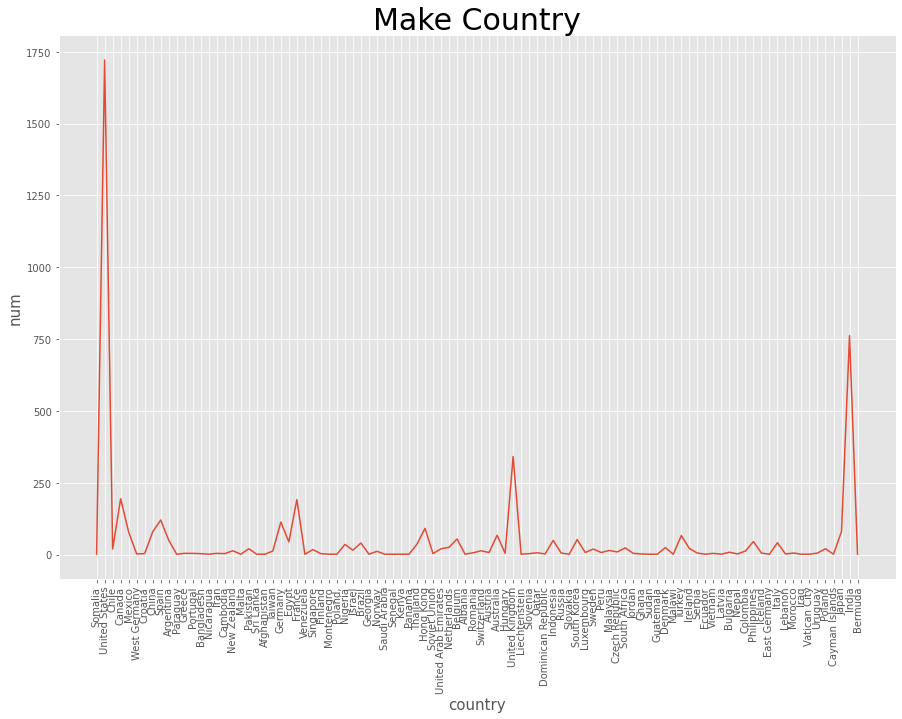

In [13]:
# 從此張圖可以看出美國、印度、英國三個國家製作的電影、電視劇最多
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.title("Make Country", fontsize=30)
plt.xlabel('country', fontsize=15)
plt.ylabel('num', fontsize=15)
plt.xticks(rotation=90)

plt.plot(list(Country_make_df.keys()), list(Country_make_df.values()))

In [14]:
# 處理時間問題
duration_list = []
for n in df['duration'].iloc:
#     print(n)
#     duration_list.append(n)
    duration_list.append(int(n.split(' ')[0]))
df['duration'] = duration_list

In [15]:
# 查看分級index
df['rating'].value_counts()
# 自定義分級lavels
TV_label={
    "TV-Y":0, #2-6
    "TV-Y7":0, # 7以上
    "TV-Y7-FV":0, # 7以上
    "TV-G":0, # 所有
    "TV-PG":0, # 8以上
    "TV-14":0, # 14以上
    "TV-MA":1, # 18以上
}

Movie_label={
    "G":0, # all
    "PG":0, # 需要家長陪同
    "PG-13":0, # 13up
    "R":1, #18 up
    "NC-17":1, # 18up
    "NR":1, # 未定義
    "UR":1 # 未定義
}
# Child = 1+2+3+5+6
# Adult = 4+7+14+15+16+17

In [16]:
# 先分成人、非成人
Label_rating = []
for n in df['rating']:
    try:
        Label_rating.append(TV_label[n])
    except:
        Label_rating.append(Movie_label[n])
df['Label_rating'] = Label_rating

c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



<BarContainer object of 2 artists>

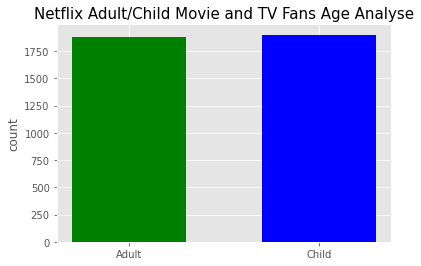

In [74]:
# Netflix上提供的影片 普遍級與限制級大約各占一半
s = (df['Label_rating']==1)
s1 = (df['Label_rating']==0)
labels=['Adult', 'Child']
plt.title("Netflix Adult/Child Movie and TV Fans Age Analyse", fontsize=15)
plt.ylabel("count")
plt.bar(range(2), [len(df[s]), len(df[s1])], width=0.6, color='gb', tick_label=labels)

In [17]:
# 分開電影df、TVdf
Movie = (df['type'] == 'Movie')
Movie_df = df[Movie]
TVShow = (df['type'] == 'TV Show')
TVShow_df = df[TVShow]

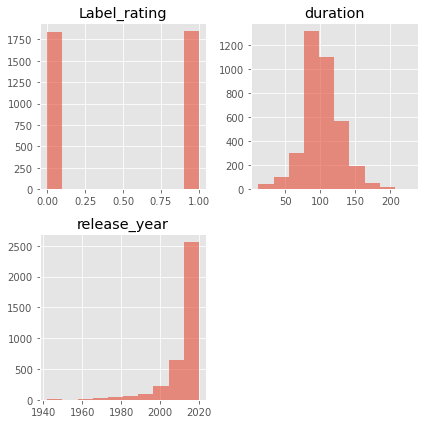

In [19]:
# Movie各項數據長條圖
# 電影普遍級與限制級則各佔一半
# 大多數電影片長介於80至130分鐘左右, 可以推估這個時長的電影較受觀眾接受
Movie_df.hist(alpha=0.6, figsize=(6,6))
plt.tight_layout()
plt.show()

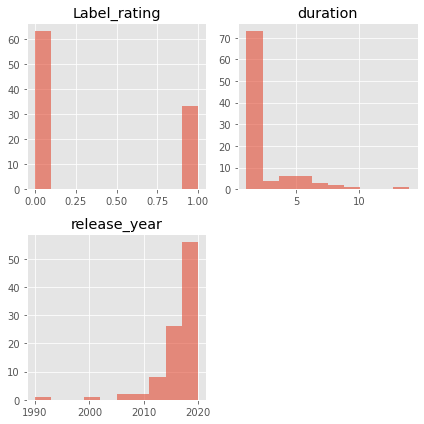

In [20]:
# TV各項數據長條圖
# 電視劇多數為普遍級(66%), 少數為限制級影片(33%)
# 電視劇平均都介於一到兩季之間, 鮮少有據能高於這個數字
TVShow_df.hist(alpha=0.6, figsize=(6,6))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Label_rating')

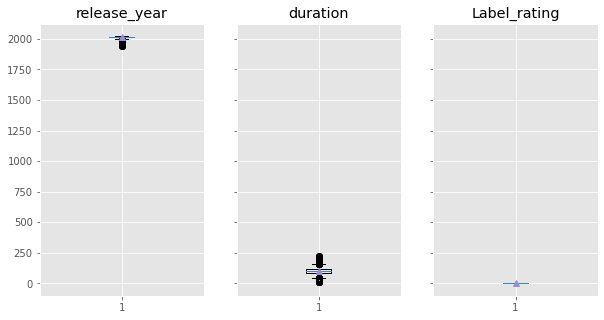

In [75]:
# 箱型圖
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharey=True)
axes[0].boxplot(Movie_df['release_year'],showmeans=True)
axes[0].set_title('release_year')

axes[1].boxplot(Movie_df['duration'],showmeans=True)
axes[1].set_title('duration')

axes[2].boxplot(Movie_df['Label_rating'],showmeans=True)
axes[2].set_title('Label_rating')


[Text(0.5, 0, 'Label_rating'), Text(0.5, 1.0, 'distribution of PetalLengthCm')]

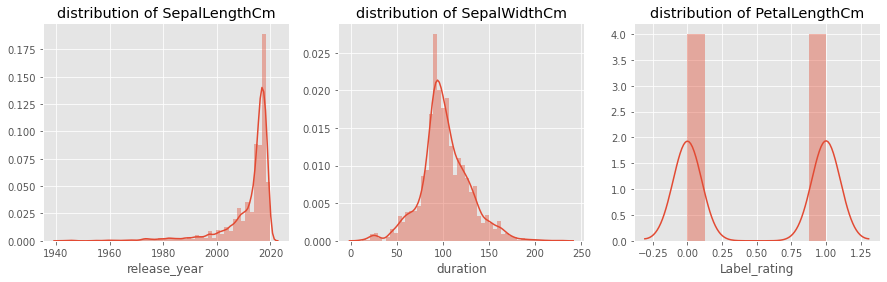

In [78]:
# 看資料分布
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(15, 4)
sns.distplot(Movie_df["release_year"][:],ax=axes[0])
sns.distplot(Movie_df["duration"][:],ax=axes[1])
sns.distplot(Movie_df["Label_rating"][:],ax=axes[2])

axes[0].set(xlabel='release_year',title="distribution of SepalLengthCm")
axes[1].set(xlabel='duration',title="distribution of SepalWidthCm")
axes[2].set(xlabel='Label_rating',title="distribution of PetalLengthCm")